Объединяем Parquet-файлы и читаем набор:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
from google.colab import drive

drive.mount('/content/drive/')

folder_path = '/content/drive/MyDrive/SC454k/'

file_path_pattern = folder_path + '000*.parquet'

df = pd.concat(map(pd.read_parquet, glob.glob(file_path_pattern)), ignore_index=True)


Mounted at /content/drive/


Обзор данных:

In [3]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453932 entries, 0 to 453931
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Symbol                 453932 non-null  object 
 1   Security               453932 non-null  object 
 2   Sector                 448447 non-null  object 
 3   Industry               448447 non-null  object 
 4   URL                    453932 non-null  object 
 5   Date                   453932 non-null  object 
 6   RelatedStocksList      328907 non-null  object 
 7   Article                453932 non-null  object 
 8   Title                  453253 non-null  object 
 9   articleType            453932 non-null  object 
 10  Publication            453674 non-null  object 
 11  Author                 320364 non-null  object 
 12  weighted_avg_-96_hrs   453932 non-null  float64
 13  weighted_avg_-48_hrs   453932 non-null  float64
 14  weighted_avg_-24_hrs   453932 non-nu

None

,Symbol,Security,Sector,Industry,URL,Date,RelatedStocksList,Article,Title,articleType,...,weighted_avg_4_hrs,weighted_avg_6_hrs,weighted_avg_8_hrs,weighted_avg_12_hrs,weighted_avg_24_hrs,weighted_avg_48_hrs,weighted_avg_72_hrs,weighted_avg_96_hrs,weighted_avg_360_hrs,weighted_avg_720_hrs
0,AAN,"The Aaron's Company, Inc.",Consumer Discretionary,Diversified Commercial Services,https://www.nasdaq.com/articles/oversold-condi...,"Apr 01, 2020 11:51 AM ET",Markets,Legendary investor Warren Buffett advises to b...,Oversold Conditions For Aaron's (AAN),News,...,19.7462,19.4873,19.4873,19.4873,19.96630,18.67280,18.6200,18.6200,22.9517,29.9366
1,AAN,"The Aaron's Company, Inc.",Consumer Discretionary,Diversified Commercial Services,https://www.nasdaq.com/press-release/the-aaron...,"Apr 01, 2022 10:13 AM ET",None,"ATLANTA, April 1, 2022 PRNewswire/ -- The Aar...",THE AARON'S COMPANY COMPLETES ACQUISITION OF B...,Press Release,...,20.0994,20.2429,20.2243,20.2243,20.21100,20.00540,20.5664,21.2563,21.3800,20.5300
2,AAN,"The Aaron's Company, Inc.",Consumer Discretionary,Diversified Commercial Services,https://www.nasdaq.com/articles/why-is-aarons-...,"Apr 02, 2023 02:24 AM ET",Technology,It has been about a month since the last earni...,Why Is Aaron's (AAN) Down 26.3% Since Last Ear...,News,...,9.6754,9.6754,9.6754,9.6754,9.64872,9.74905,9.5100,9.5025,10.5237,13.1491
3,AAN,"The Aaron's Company, Inc.",Consumer Discretionary,Diversified Commercial Services,https://www.nasdaq.com/articles/3-retail-stock...,"Apr 04, 2019 06:08 AM ET",TGT|Markets|BBY|WMT|AMZN,"The S&P 500 has climbed nearly 15% this year, ...",3 Retail Stocks to Buy Right Now for Value & I...,News,...,53.1776,53.0295,52.8042,53.0192,53.13670,53.50490,53.3622,53.3575,53.1700,58.7500
4,AAN,"The Aaron's Company, Inc.",Consumer Discretionary,Diversified Commercial Services,https://www.nasdaq.com/articles/aarons-aan-bra...,"Apr 04, 2022 03:50 PM ET",Stocks|COLM|GIL|DLA,"**The Aaron's Company, Inc.** [AAN](https://ww...",Aaron's (AAN) BrandsMart Buyout to Boost Sales...,News,...,20.0059,20.3200,20.7064,20.9341,20.93040,20.66930,20.2810,20.7663,21.2368,21.3614


Проверка на пустые значения:

In [4]:
display(df.isnull().sum())

,0
Symbol,0
Security,0
Sector,5485
Industry,5485
URL,0
Date,0
RelatedStocksList,125025
Article,0
Title,679
articleType,0


Расчет длины текстов:

In [18]:
# Подсчет длины текста в словах
df['word_length'] = df['Article'].apply(lambda x: len(x.split()))

# Расчет средней, минимальной и максимальной длины
mean_length = round(df['word_length'].mean(), 2)
min_length = round(df['word_length'].min(), 2)
max_length = round(df['word_length'].max(), 2)

print(f"Средняя длина текста: {mean_length} слов")
print(f"Минимальная длина текста: {min_length} слов")
print(f"Максимальная длина текста: {max_length} слов")

# Подсчет длины текста в символах
df['char_length'] = df['Article'].apply(len)

# Средняя, минимальная и максимальная длина в символах
mean_char_length = round(df['char_length'].mean(), 2)
min_char_length = round(df['char_length'].min(), 2)
max_char_length = round(df['char_length'].max(), 2)

print(f"Средняя длина текста: {mean_char_length} символов")
print(f"Минимальная длина текста: {min_char_length} символов")
print(f"Максимальная длина текста: {max_char_length} символов")

# Функция для удаления выбросов
def remove_outliers_quantiles(data, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = data.quantile(lower_quantile)
    upper_bound = data.quantile(upper_quantile)
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Удаление выбросов из данных о длине текста в словах и символах
filtered_word_length = remove_outliers_quantiles(df['word_length'])
filtered_char_length = remove_outliers_quantiles(df['char_length'])

# Подсчет средней, минимальной и максимальной длины текста в словах после удаления выбросов
mean_length_filtered = round(filtered_word_length.mean(), 2)
min_length_filtered = round(filtered_word_length.min(), 2)
max_length_filtered = round(filtered_word_length.max(), 2)

print(f"Средняя длина текста (без выбросов): {mean_length_filtered} слов")
print(f"Минимальная длина текста (без выбросов): {min_length_filtered} слов")
print(f"Максимальная длина текста (без выбросов): {max_length_filtered} слов")

# Подсчет средней, минимальной и максимальной длины текста в символах после удаления выбросов
mean_char_length_filtered = round(filtered_char_length.mean(), 2)
min_char_length_filtered = round(filtered_char_length.min(), 2)
max_char_length_filtered = round(filtered_char_length.max(), 2)

print(f"Средняя длина текста (без выбросов): {mean_char_length_filtered} символов")
print(f"Минимальная длина текста (без выбросов): {min_char_length_filtered} символов")
print(f"Максимальная длина текста (без выбросов): {max_char_length_filtered} символов")


Средняя длина текста: 1085.22 слов
Минимальная длина текста: 3 слов
Максимальная длина текста: 60220 слов
Средняя длина текста: 7765.27 символов
Минимальная длина текста: 12 символов
Максимальная длина текста: 1055560 символов
Средняя длина текста (без выбросов): 755.32 слов
Минимальная длина текста (без выбросов): 168 слов
Максимальная длина текста (без выбросов): 4454 слов
Средняя длина текста (без выбросов): 6004.02 символов
Минимальная длина текста (без выбросов): 1342 символов
Максимальная длина текста (без выбросов): 26723 символов


Визуализация распределения длины текстов:

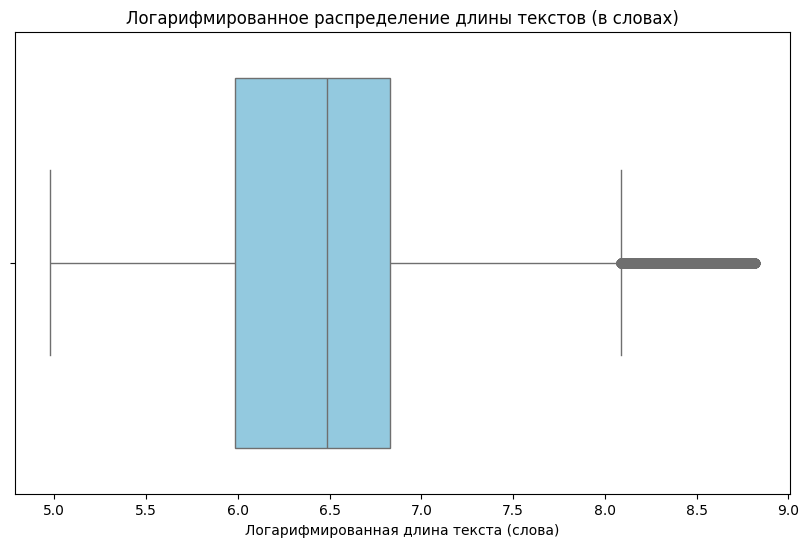

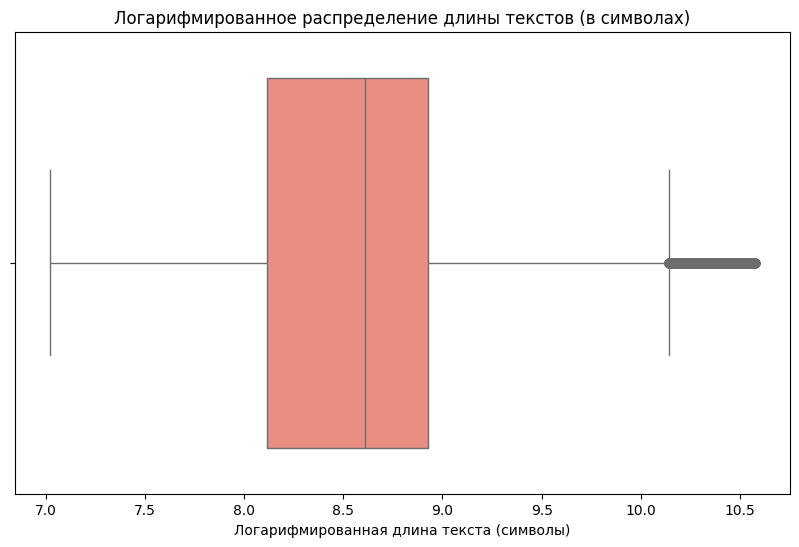

In [21]:
# Обрезка выбросов
df['word_length'] = remove_outliers_quantiles(df['word_length'])
df['char_length'] = remove_outliers_quantiles(df['char_length'])

# Логарифмируем данные перед визуализацией
df['log_word_length'] = np.log1p(df['word_length'])
df['log_char_length'] = np.log1p(df['char_length'])

# Визуализация длины текстов в словах (Box Plot) с логарифмом
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_word_length'], color='skyblue')
plt.title('Логарифмированное распределение длины текстов (в словах)')
plt.xlabel('Логарифмированная длина текста (слова)')
plt.show()

# Визуализация длины текстов в символах (Box Plot) с логарифмом
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_char_length'], color='salmon')
plt.title('Логарифмированное распределение длины текстов (в символах)')
plt.xlabel('Логарифмированная длина текста (символы)')
plt.show()

Анализ распределения категориальных переменных:

In [22]:
type_counts = df['articleType'].value_counts()
display(type_counts)

sector_counts = df['Sector'].value_counts()
display(sector_counts)

industry_counts = df['Industry'].value_counts()
display(industry_counts)

# Группируем по столбцу 'Symbol' и считаем количество новостей для каждого тикера
ticker_news_counts = df.groupby('Symbol').size().reset_index(name='news_count')
ticker_news_counts = ticker_news_counts.sort_values(by='news_count', ascending=False)
display(ticker_news_counts)

,count
articleType,
News,337178
Press Release,116754


,count
Sector,
Consumer Discretionary,117625
Health Care,83816
Technology,61486
Finance,59337
Industrials,41711
Real Estate,24908
Energy,18644
Basic Materials,12168
Consumer Staples,10493


,count
Industry,
Biotechnology: Pharmaceutical Preparations,34649
Major Banks,23607
Real Estate Investment Trusts,20262
Computer Software: Prepackaged Software,15487
Biotechnology: Biological Products (No Diagnostic Substances),13981
...,...
Diversified Financial Services,165
Wholesale Distributors,151
Environmental Services,6


,Symbol,news_count
56,AMC,4003
242,CGC,3626
879,NVAX,3087
132,B,3023
659,JBLU,2987
...,...,...
670,KBDC,2
532,GRAL,2
560,HDL,2
1057,RRAC,1


Визуализации распределений:

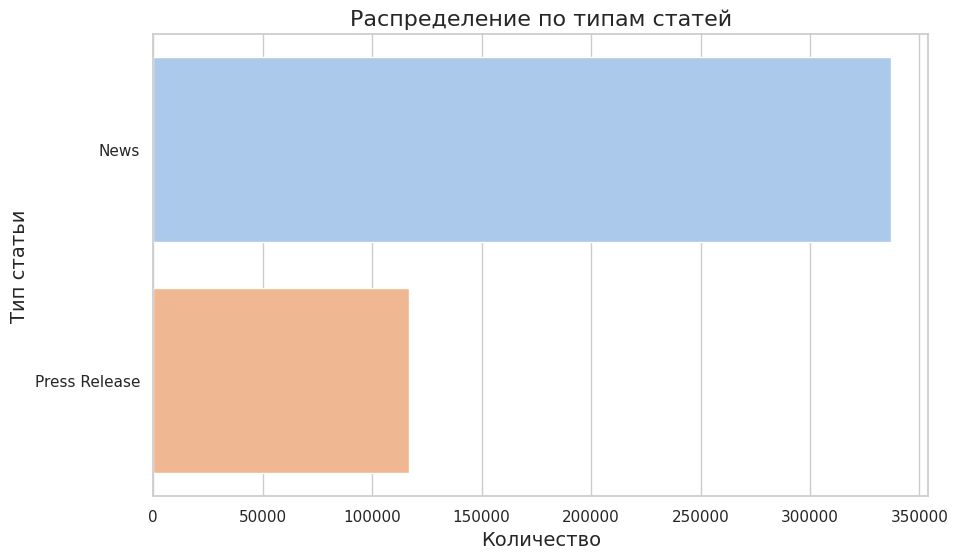

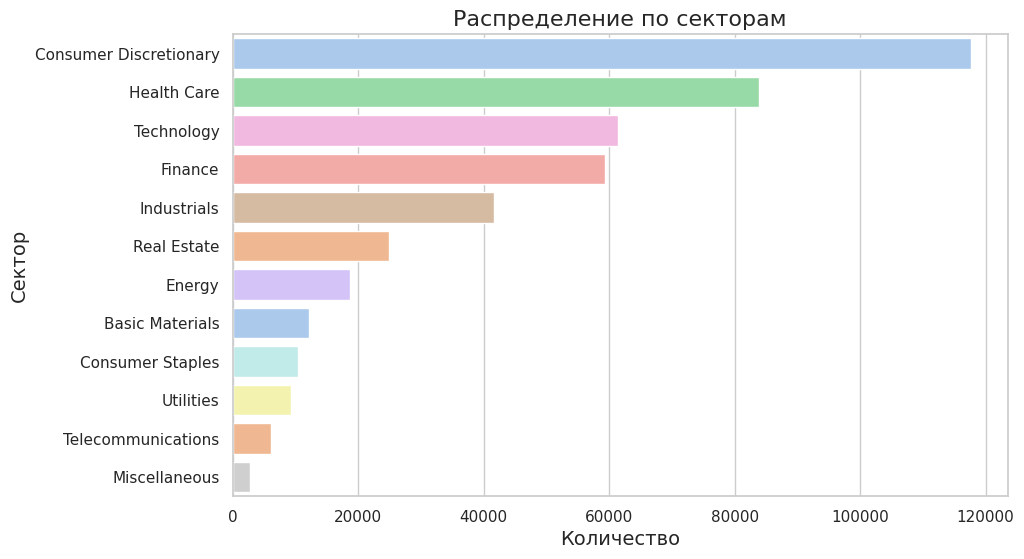

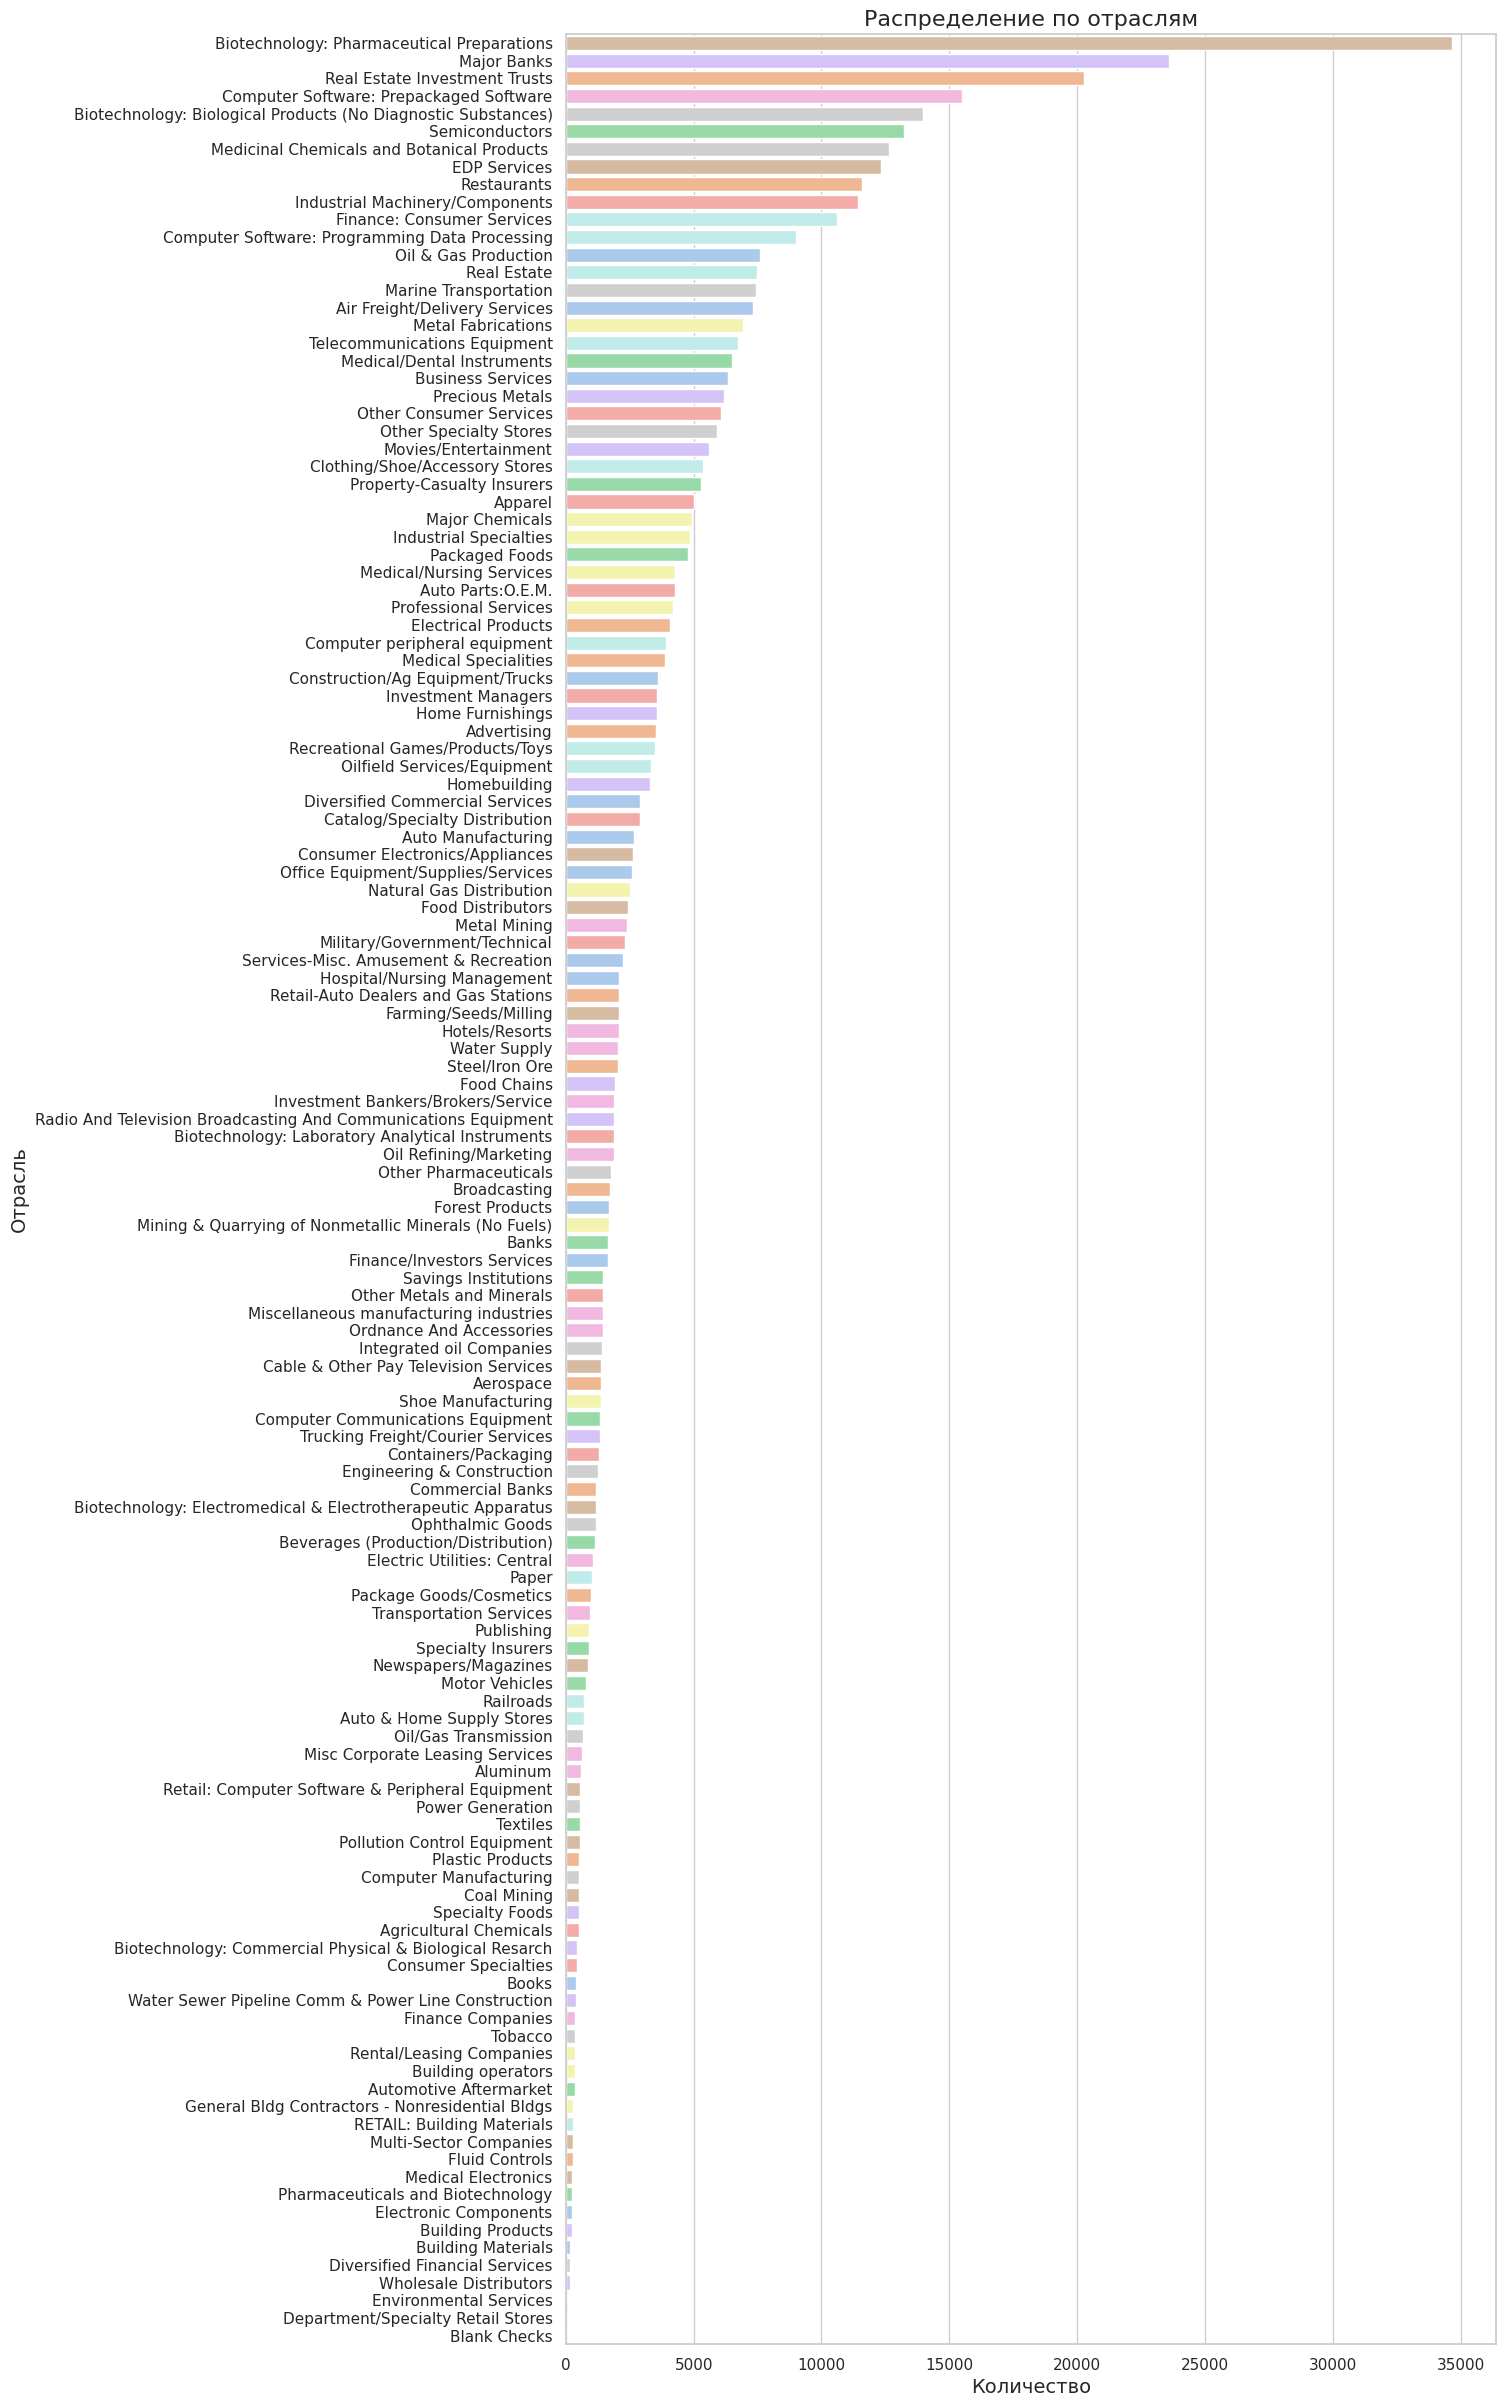

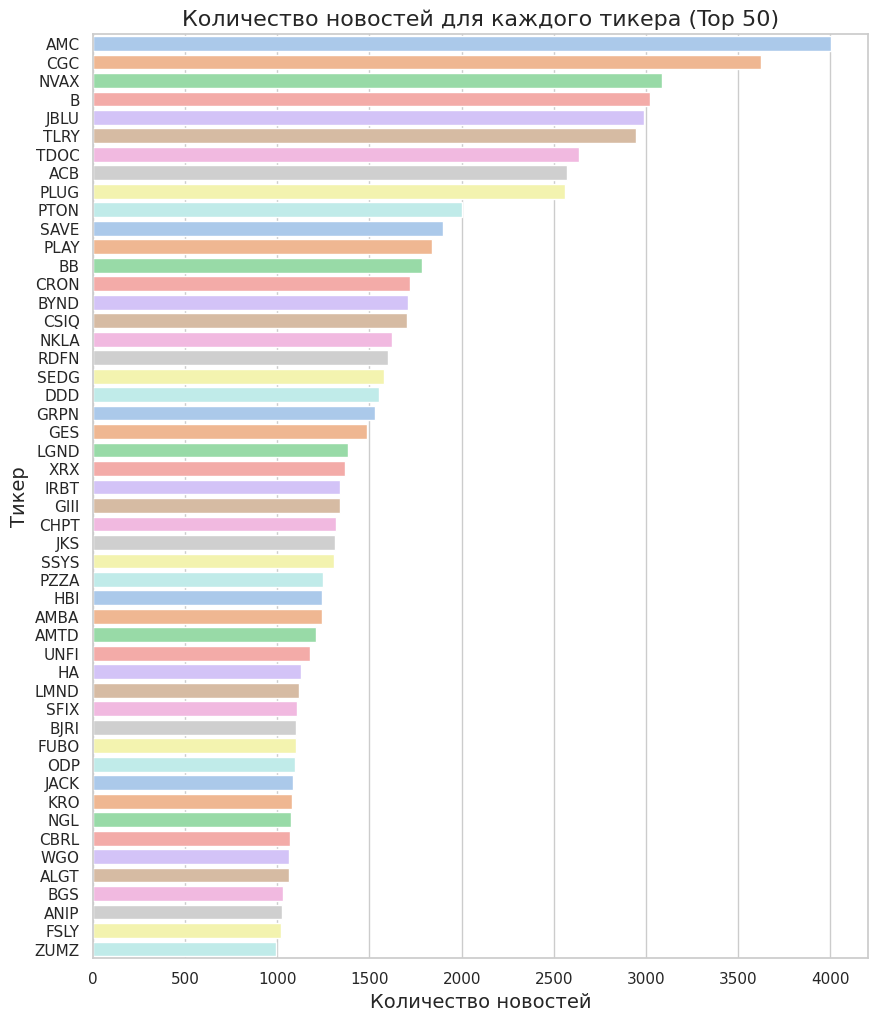

In [51]:
# Настройка стиля графиков
sns.set(style="whitegrid")

# 1. Визуализация типов статей
plt.figure(figsize=(10, 6))
sns.countplot(y='articleType', data=df, order=df['articleType'].value_counts().index, hue='articleType', palette='pastel', legend=False)
plt.title('Распределение по типам статей', fontsize=16)
plt.xlabel('Количество', fontsize=14)
plt.ylabel('Тип статьи', fontsize=14)
plt.show()

# 2. Визуализация секторов
plt.figure(figsize=(10, 6))
sns.countplot(y='Sector', data=df, order=df['Sector'].value_counts().index, hue='Sector', palette='pastel', legend=False)
plt.title('Распределение по секторам', fontsize=16)
plt.xlabel('Количество', fontsize=14)
plt.ylabel('Сектор', fontsize=14)
plt.show()

# 3. Визуализация отраслей
plt.figure(figsize=(12, 30))
sns.countplot(y='Industry', data=df, order=df['Industry'].value_counts().index, hue='Industry', palette='pastel', legend=False)
plt.title('Распределение по отраслям', fontsize=16)
plt.xlabel('Количество', fontsize=14)
plt.ylabel('Отрасль', fontsize=14)
plt.show()

# 4. Визуализация для количества новостей по тикерам
top_tickers = ticker_news_counts.head(50)

plt.figure(figsize=(10, 12))
sns.barplot(y='Symbol', x='news_count', data=top_tickers, palette='pastel', orient='h', hue='Symbol', legend=False)
plt.title('Количество новостей для каждого тикера (Top 50)', fontsize=16)
plt.xlabel('Количество новостей', fontsize=14)
plt.ylabel('Тикер', fontsize=14)
plt.show()

Процентное распределение новостей секторов по индустриям:

In [85]:
df = df.dropna(subset=['Sector', 'Industry'])

# Создание сводной таблицы
pivot_table = df.pivot_table(index='Sector', columns='Industry', aggfunc='size', fill_value=0)

# Рассчитываем процент от общего количества в каждом секторе
percentage_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Заменяем 0 на '-'
percentage_table = percentage_table.replace(0.0, '-')

# Применяем форматирование для округления до 1 знака после запятой и удаления лишних нулей
percentage_table = percentage_table.apply(lambda x: x.map(lambda y: '-' if y == '-' else f"{y:.1f}" if y >= 0 else y))

# Применение стиля
styled_percentage_table = (
    percentage_table.style
    .set_sticky()
)

# Отображение таблицы
styled_percentage_table

Industry,Medicinal Chemicals and Botanical Products,Advertising,Aerospace,Agricultural Chemicals,Air Freight/Delivery Services,Aluminum,Apparel,Auto & Home Supply Stores,Auto Manufacturing,Auto Parts:O.E.M.,Automotive Aftermarket,Banks,Beverages (Production/Distribution),Biotechnology: Biological Products (No Diagnostic Substances),Biotechnology: Commercial Physical & Biological Resarch,Biotechnology: Electromedical & Electrotherapeutic Apparatus,Biotechnology: Laboratory Analytical Instruments,Biotechnology: Pharmaceutical Preparations,Blank Checks,Books,Broadcasting,Building Materials,Building Products,Building operators,Business Services,Cable & Other Pay Television Services,Catalog/Specialty Distribution,Clothing/Shoe/Accessory Stores,Coal Mining,Commercial Banks,Computer Communications Equipment,Computer Manufacturing,Computer Software: Prepackaged Software,Computer Software: Programming Data Processing,Computer peripheral equipment,Construction/Ag Equipment/Trucks,Consumer Electronics/Appliances,Consumer Specialties,Containers/Packaging,Department/Specialty Retail Stores,Diversified Commercial Services,Diversified Financial Services,EDP Services,Electric Utilities: Central,Electrical Products,Electronic Components,Engineering & Construction,Environmental Services,Farming/Seeds/Milling,Finance Companies,Finance/Investors Services,Finance: Consumer Services,Fluid Controls,Food Chains,Food Distributors,Forest Products,General Bldg Contractors - Nonresidential Bldgs,Home Furnishings,Homebuilding,Hospital/Nursing Management,Hotels/Resorts,Industrial Machinery/Components,Industrial Specialties,Integrated oil Companies,Investment Bankers/Brokers/Service,Investment Managers,Major Banks,Major Chemicals,Marine Transportation,Medical Electronics,Medical Specialities,Medical/Dental Instruments,Medical/Nursing Services,Metal Fabrications,Metal Mining,Military/Government/Technical,Mining & Quarrying of Nonmetallic Minerals (No Fuels),Misc Corporate Leasing Services,Miscellaneous manufacturing industries,Motor Vehicles,Movies/Entertainment,Multi-Sector Companies,Natural Gas Distribution,Newspapers/Magazines,Office Equipment/Supplies/Services,Oil & Gas Production,Oil Refining/Marketing,Oil/Gas Transmission,Oilfield Services/Equipment,Ophthalmic Goods,Ordnance And Accessories,Other Consumer Services,Other Metals and Minerals,Other Pharmaceuticals,Other Specialty Stores,Package Goods/Cosmetics,Packaged Foods,Paper,Pharmaceuticals and Biotechnology,Plastic Products,Pollution Control Equipment,Power Generation,Precious Metals,Professional Services,Property-Casualty Insurers,Publishing,RETAIL: Building Materials,Radio And Television Broadcasting And Communications Equipment,Railroads,Real Estate,Real Estate Investment Trusts,Recreational Games/Products/Toys,Rental/Leasing Companies,Restaurants,Retail-Auto Dealers and Gas Stations,Retail: Computer Software & Peripheral Equipment,Savings Institutions,Semiconductors,Services-Misc. Amusement & Recreation,Shoe Manufacturing,Specialty Foods,Specialty Insurers,Steel/Iron Ore,Telecommunications Equipment,Textiles,Tobacco,Transportation Services,Trucking Freight/Courier Services,Water Sewer Pipeline Comm & Power Line Construction,Water Supply,Wholesale Distributors
Sector,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Basic Materials,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,13.9,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,19.5,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,12.0,-,-,-,-,8.5,-,-,-,-,46.1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Consumer Discretionary,-,3.0,-,-,6.2,-,4.2,0.6,2.3,3.6,0.3,-,-,-,-,-,-,-,-,0.3,-,-,0.2,-,5.4,-,2.5,4.6,-,-,-,-,-,-,-,0.7,1.3,0.4,1.0,0.0,2.4,-,-,-,-,-,1.1,-,-,-,-,-,-,-,2.1,-,0.2,3.0,1.8,-,1.8,1.1,2.6,-,-,-,-,-,5.4,-,-,-,-,0.3,-,0.8,-,-,1.2,0.7,4.8,-,-,0.7,0.6,-,0.3,-,-,-,-,2.1,-,-,4.8,0.8,-,-,-,-,-,-,-,3.6,-,0.8,0.2,

Распределение типов статей по секторам:

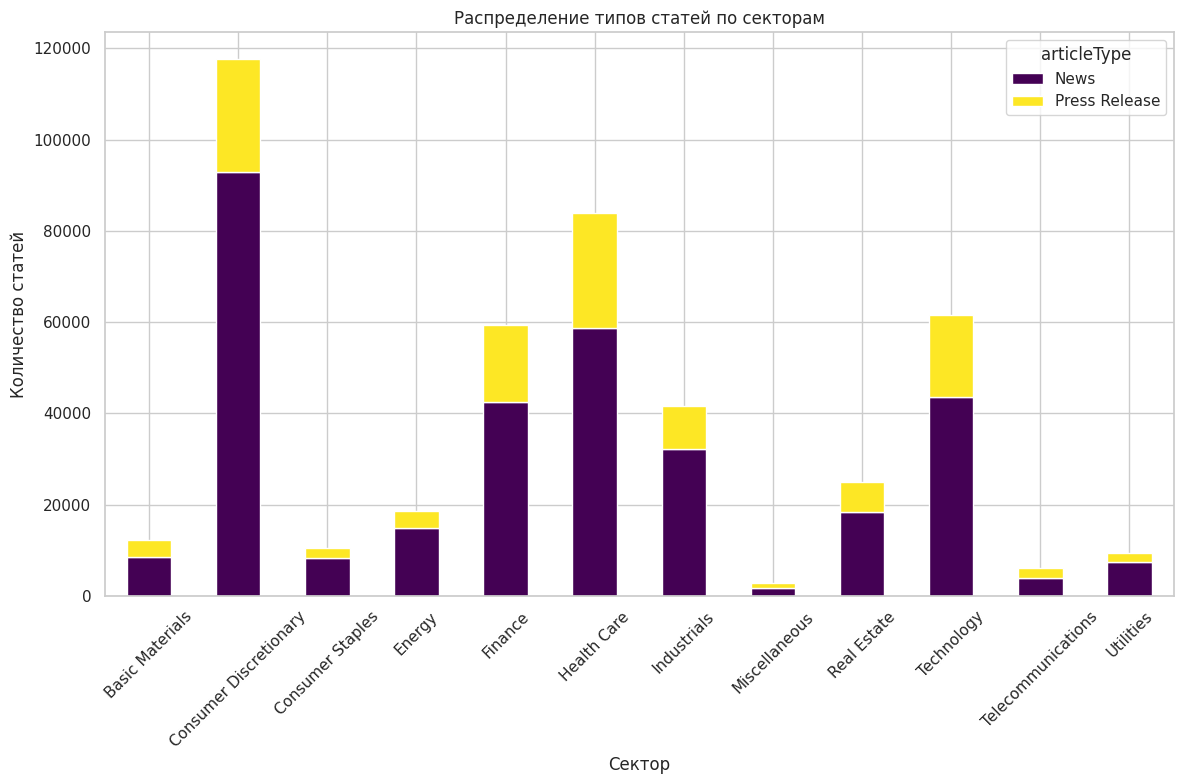

In [55]:
# Группировка по секторам и типам статей
sector_article_counts = df.groupby(['Sector', 'articleType']).size().unstack(fill_value=0)

# Визуализация по секторам
plt.figure(figsize=(12, 8))
sector_article_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Распределение типов статей по секторам')
plt.xlabel('Сектор')
plt.ylabel('Количество статей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Добавление целевых переменных и выявление корреляций между ними:

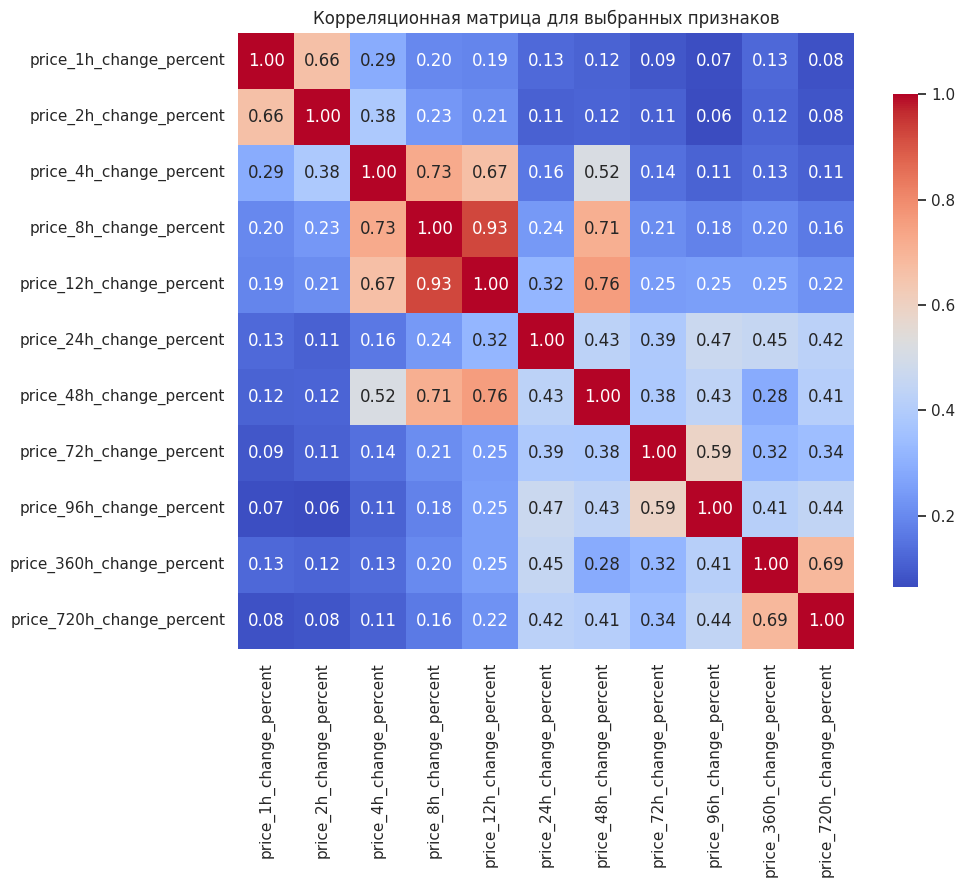

In [50]:
# Добавление столбцов с изменением цен
df['price_1h_change_percent'] = ((df['weighted_avg_1_hrs'] - df['weighted_avg_0_hrs']) / df['weighted_avg_0_hrs'] * 100).round(2)
df['price_2h_change_percent'] = ((df['weighted_avg_2_hrs'] - df['weighted_avg_0_hrs']) / df['weighted_avg_0_hrs'] * 100).round(2)
df['price_4h_change_percent'] = ((df['weighted_avg_4_hrs'] - df['weighted_avg_0_hrs']) / df['weighted_avg_0_hrs'] * 100).round(2)
df['price_8h_change_percent'] = ((df['weighted_avg_8_hrs'] - df['weighted_avg_0_hrs']) / df['weighted_avg_0_hrs'] * 100).round(2)
df['price_12h_change_percent'] = ((df['weighted_avg_12_hrs'] - df['weighted_avg_0_hrs']) / df['weighted_avg_0_hrs'] * 100).round(2)
df['price_24h_change_percent'] = ((df['weighted_avg_24_hrs'] - df['weighted_avg_0_hrs']) / df['weighted_avg_0_hrs'] * 100).round(2)
df['price_48h_change_percent'] = ((df['weighted_avg_48_hrs'] - df['weighted_avg_0_hrs']) / df['weighted_avg_0_hrs'] * 100).round(2)
df['price_72h_change_percent'] = ((df['weighted_avg_72_hrs'] - df['weighted_avg_0_hrs']) / df['weighted_avg_0_hrs'] * 100).round(2)
df['price_96h_change_percent'] = ((df['weighted_avg_96_hrs'] - df['weighted_avg_0_hrs']) / df['weighted_avg_0_hrs'] * 100).round(2)
df['price_360h_change_percent'] = ((df['weighted_avg_360_hrs'] - df['weighted_avg_0_hrs']) / df['weighted_avg_0_hrs'] * 100).round(2)
df['price_720h_change_percent'] = ((df['weighted_avg_720_hrs'] - df['weighted_avg_0_hrs']) / df['weighted_avg_0_hrs'] * 100).round(2)

selected_columns = [
    'price_1h_change_percent',
    'price_2h_change_percent',
    'price_4h_change_percent',
    'price_8h_change_percent',
    'price_12h_change_percent',
    'price_24h_change_percent',
    'price_48h_change_percent',
    'price_72h_change_percent',
    'price_96h_change_percent',
    'price_360h_change_percent',
    'price_720h_change_percent'
]

numeric_df = df[selected_columns]

# Вычисление корреляционной матрицы
correlation_matrix = numeric_df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица для выбранных признаков')
plt.show()

Анализ сезонности выхода новостей:

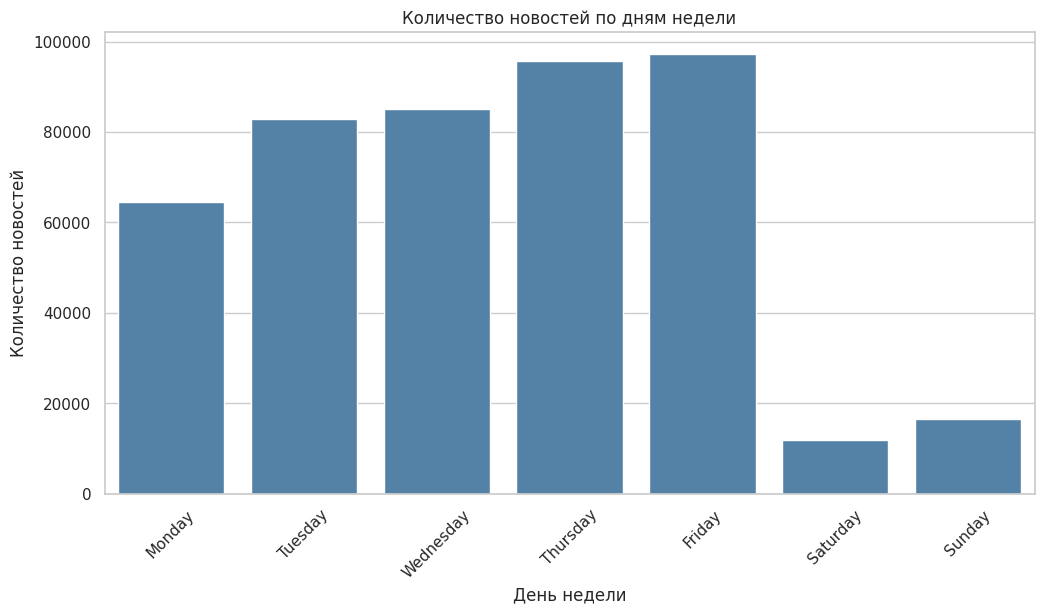

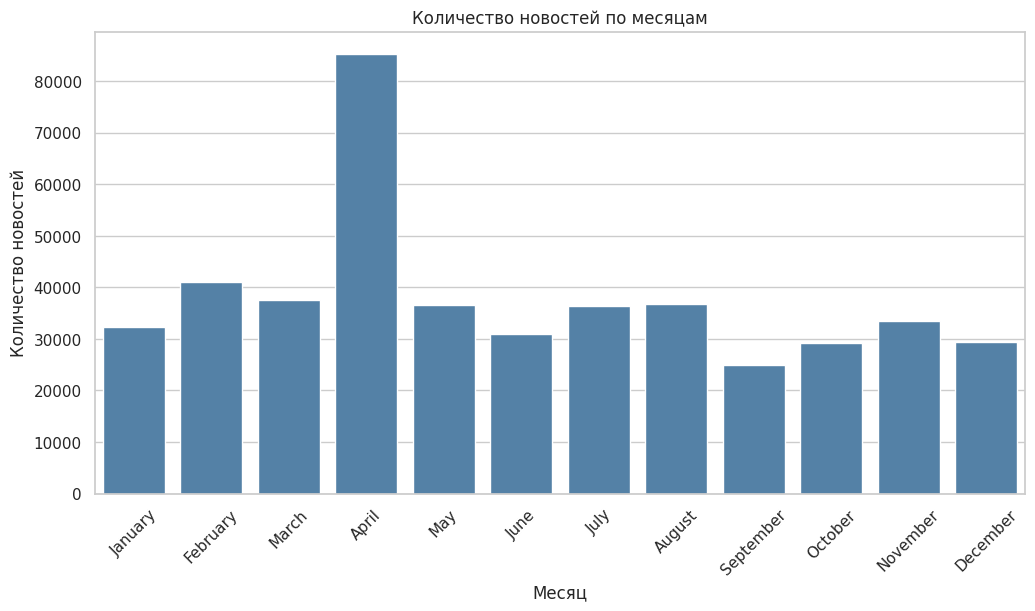

In [54]:
# Преобразуем столбец Data в datetime
df['Date'] = pd.to_datetime(df['Date'])

# Добавим колонки для дня недели и месяца
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()

# Группировка по дням недели
day_counts = df['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Группировка по месяцам
month_counts = df['Month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June',
                                                   'July', 'August', 'September', 'October', 'November', 'December'])

# Визуализация по дням недели
plt.figure(figsize=(12, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, color='steelblue')
plt.title('Количество новостей по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество новостей')
plt.xticks(rotation=45)
plt.show()

# Визуализация по месяцам
plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, color='steelblue')
plt.title('Количество новостей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество новостей')
plt.xticks(rotation=45)
plt.show()

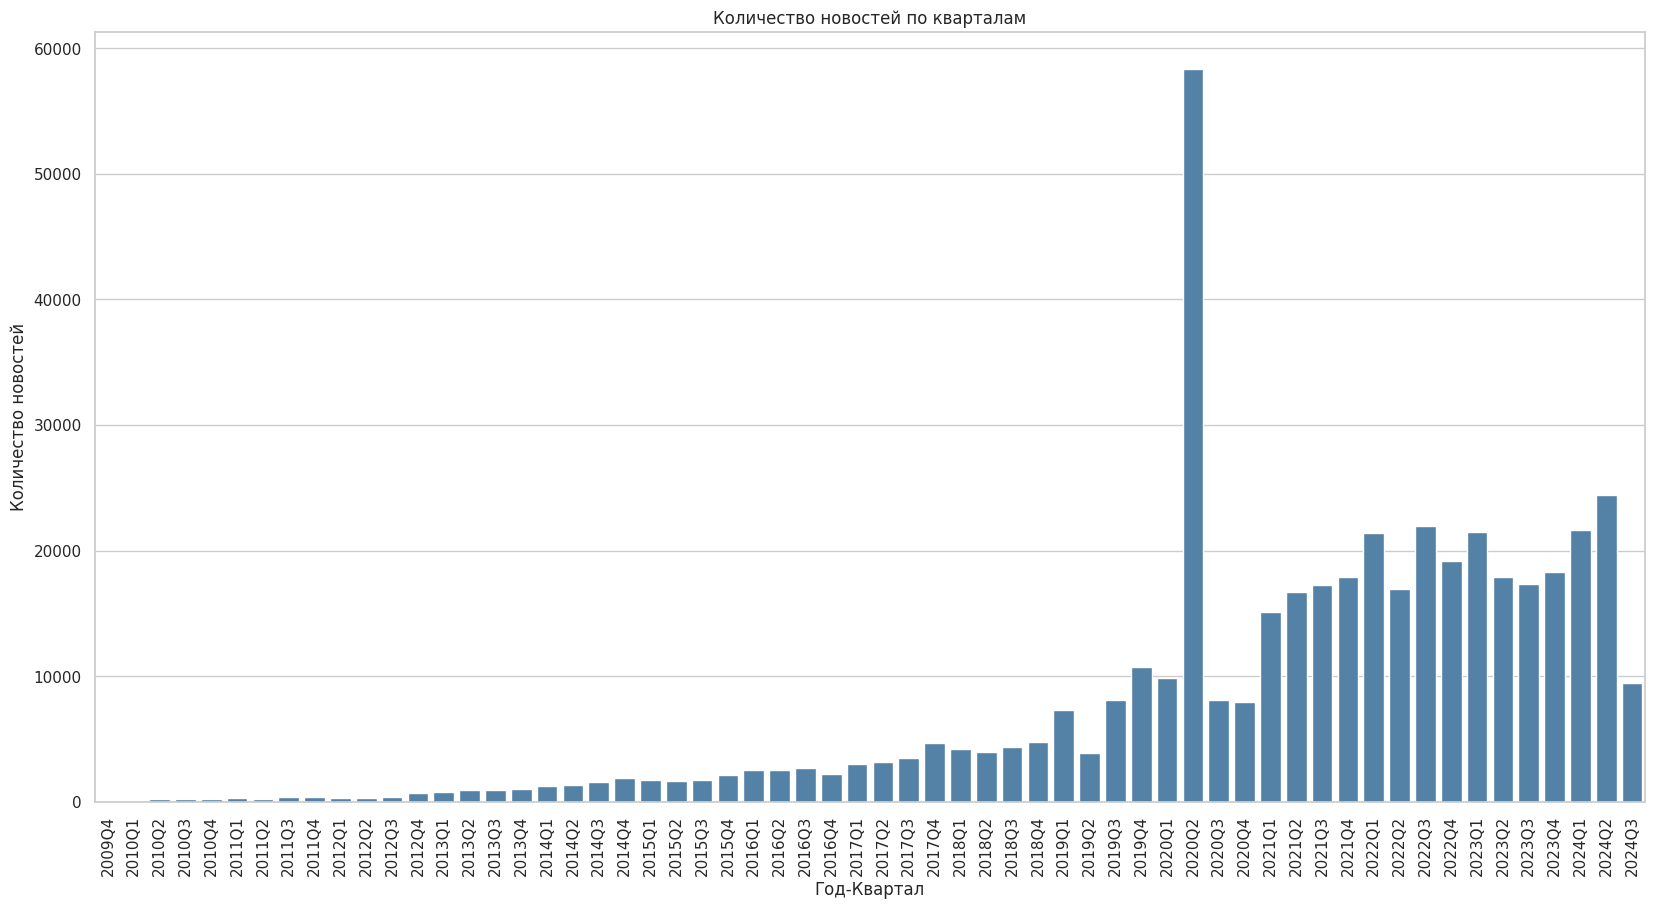

In [52]:
# Добавляем колонку для года и квартала
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.to_period('Q')  # Извлекаем квартал

# Группировка по годам и кварталам
quarter_counts = df['Quarter'].value_counts().sort_index()

# Визуализация
plt.figure(figsize=(20, 10))
sns.barplot(x=quarter_counts.index.astype(str), y=quarter_counts.values, color='steelblue')
plt.title('Количество новостей по кварталам')
plt.xlabel('Год-Квартал')
plt.ylabel('Количество новостей')
plt.xticks(rotation=90)
plt.show()

Анализ временной динамики статей по типам и секторам:

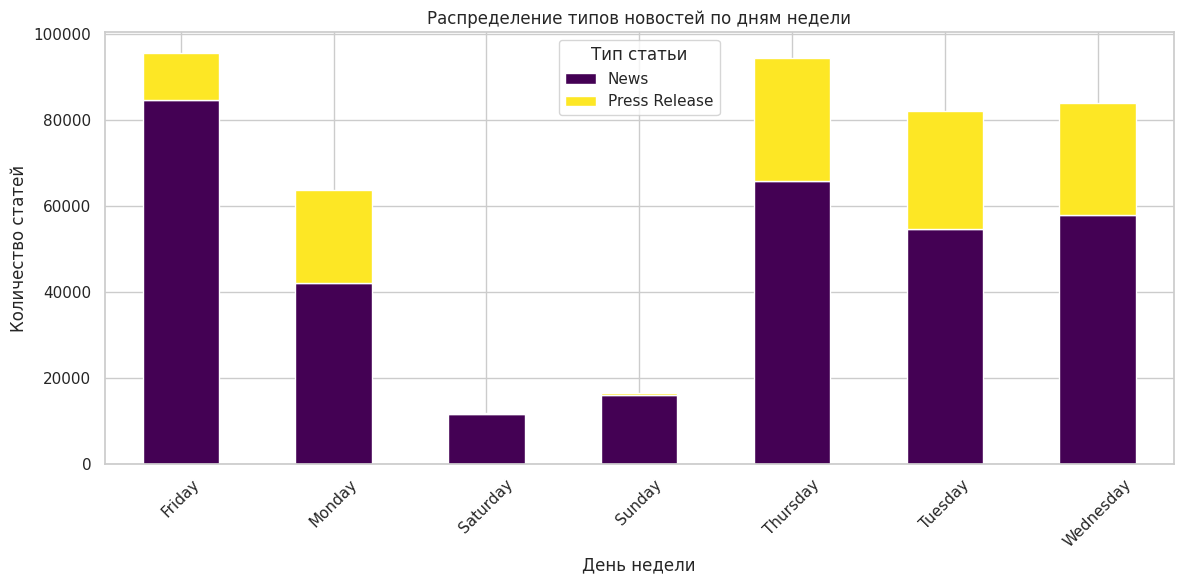

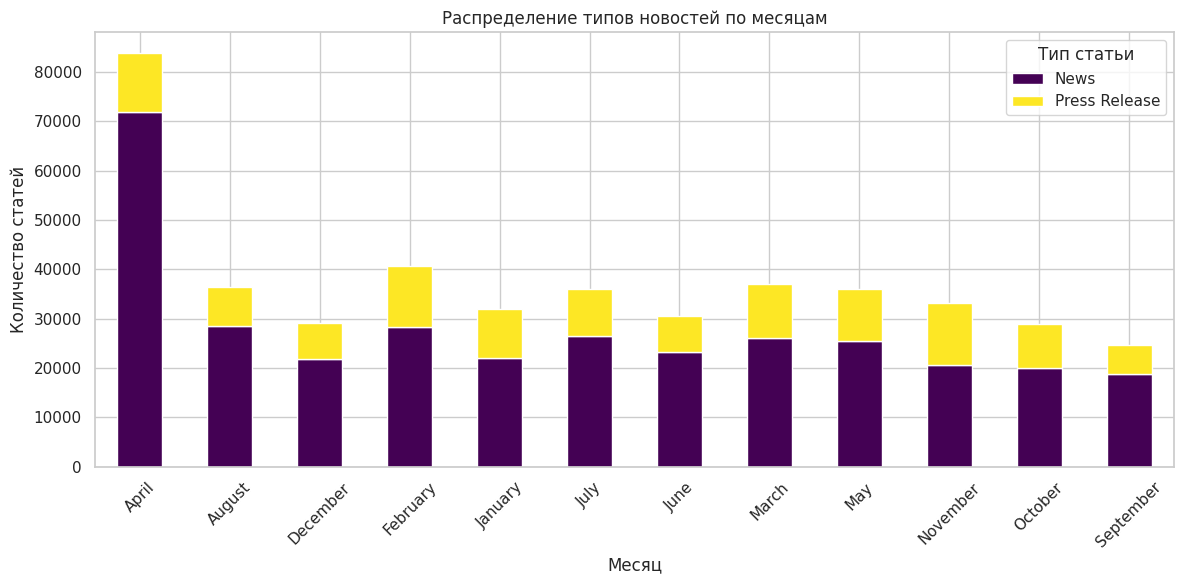

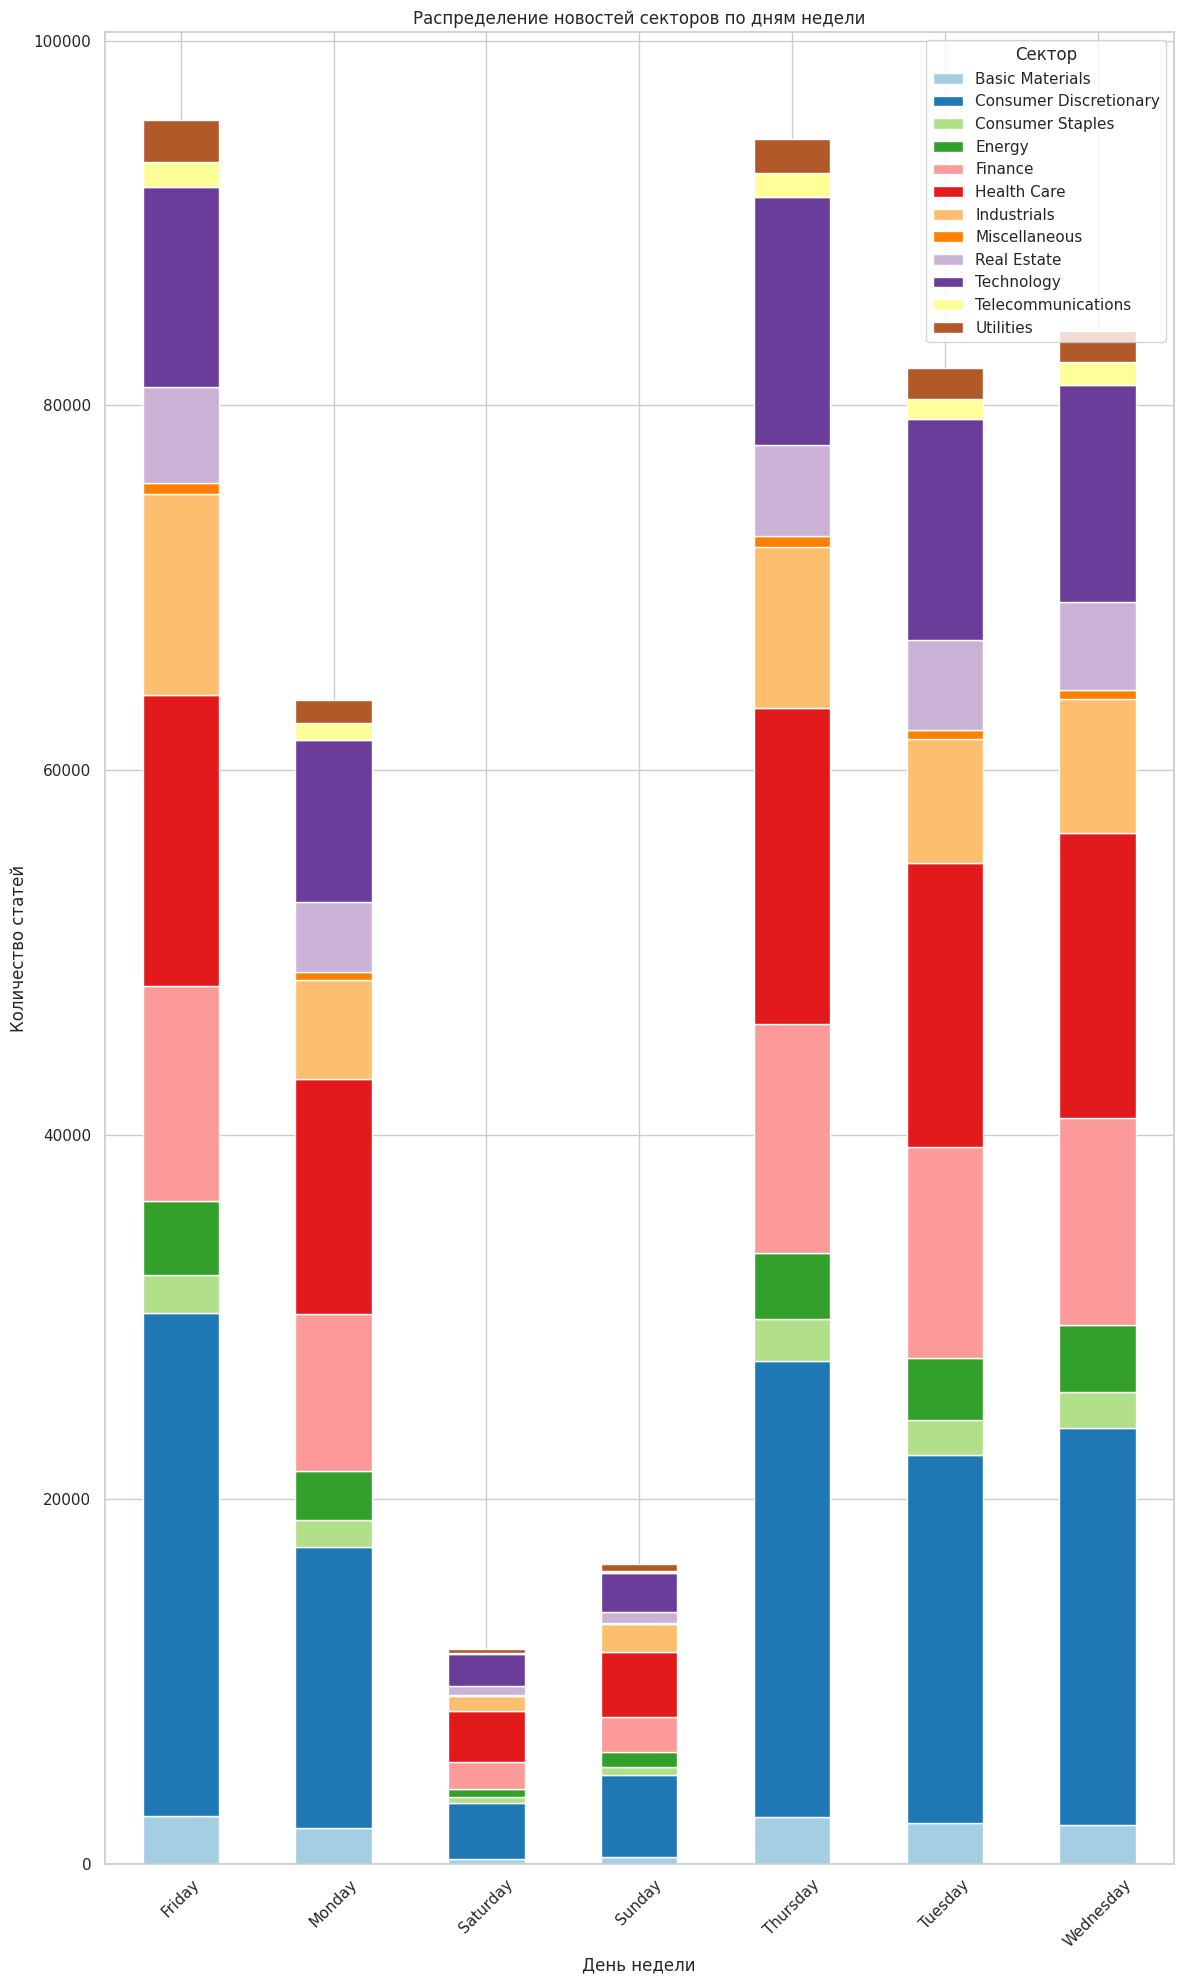

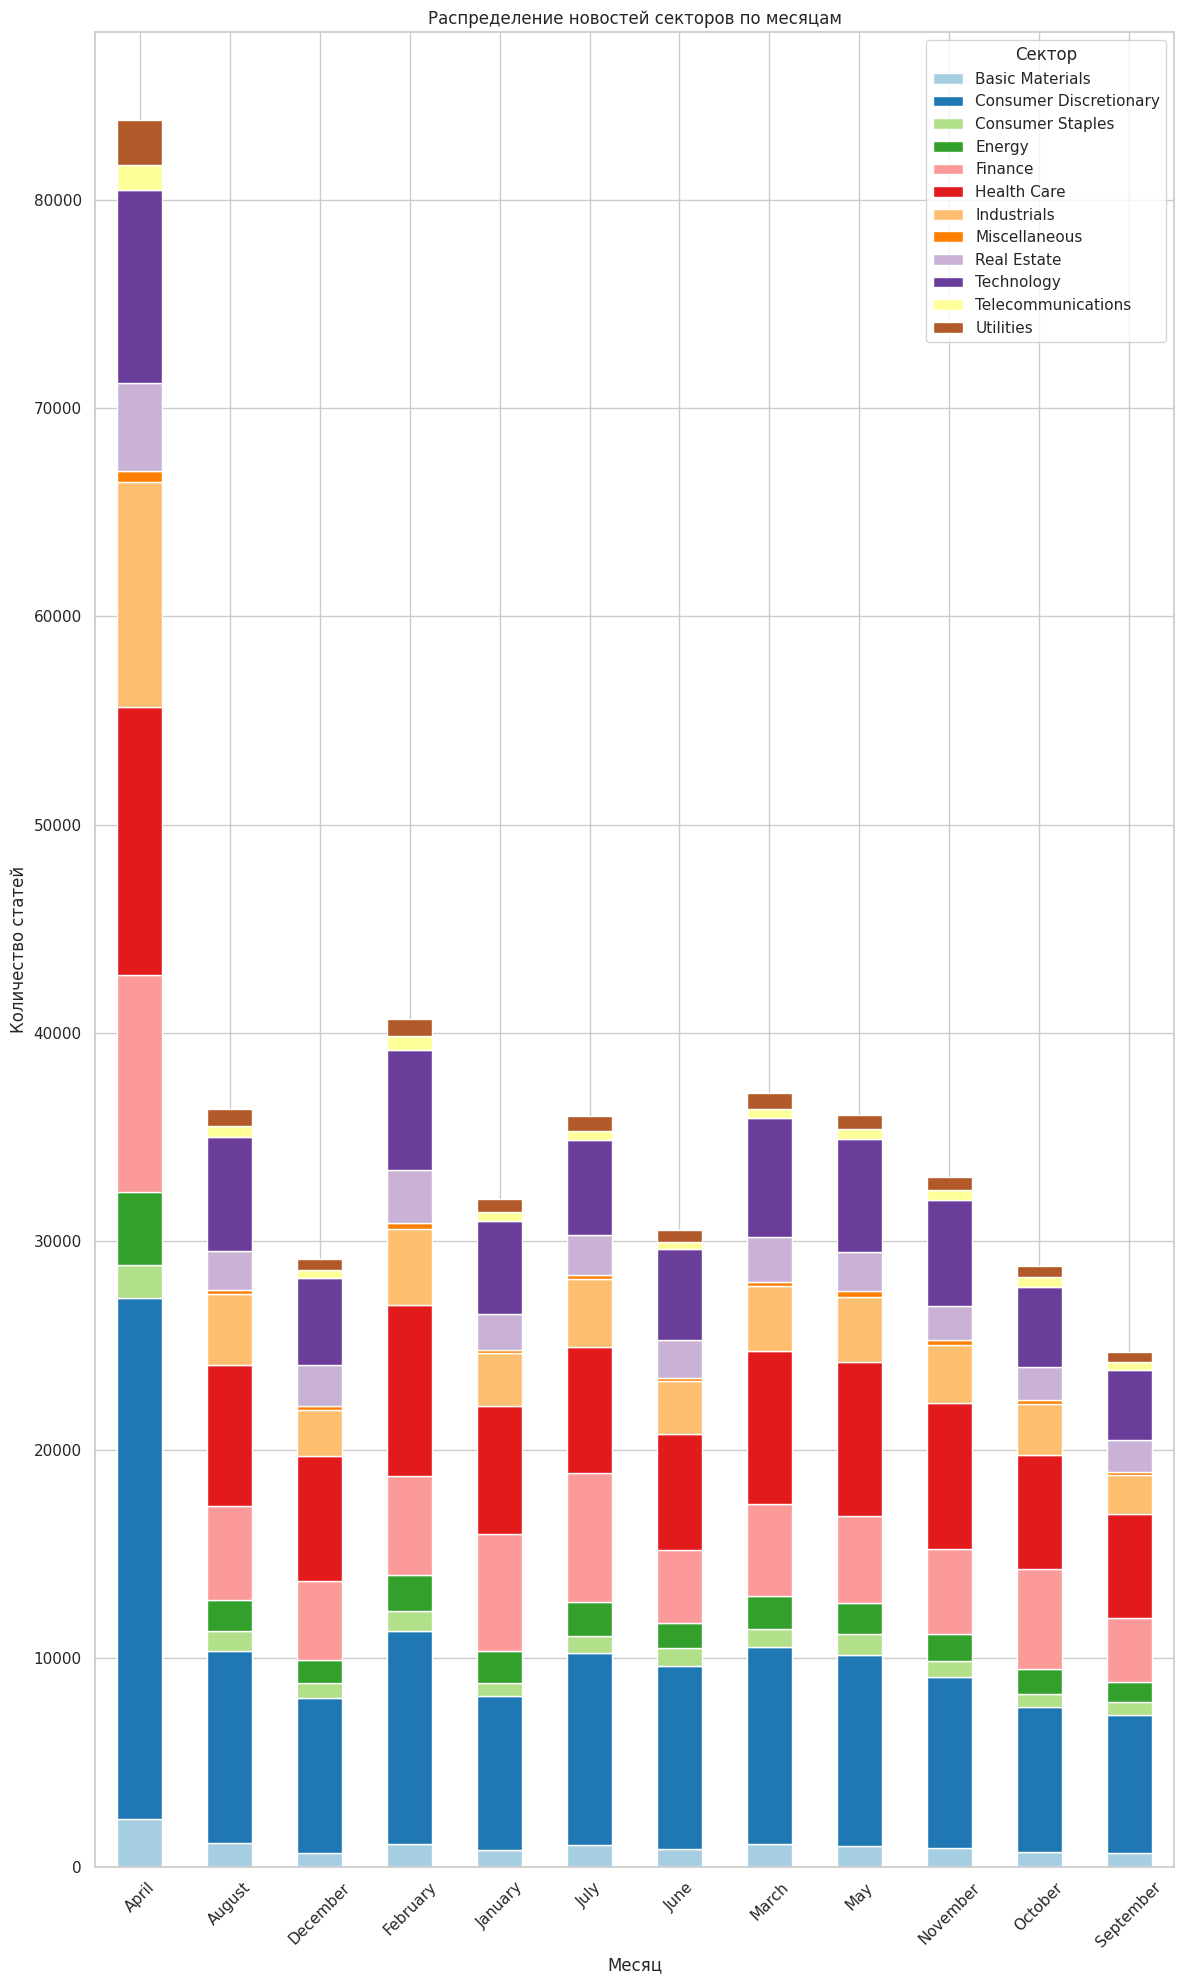

In [86]:
# Группировка по типу статьи и дню недели
day_article_counts = df.groupby(['DayOfWeek', 'articleType'], observed=False).size().unstack(fill_value=0)

# Группировка по типу статьи и месяцу
month_article_counts = df.groupby(['Month', 'articleType'], observed=False).size().unstack(fill_value=0)

# Визуализация по дням недели
plt.figure(figsize=(12, 6))
day_article_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Распределение типов новостей по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество статей')
plt.xticks(rotation=45)
plt.legend(title='Тип статьи')
plt.tight_layout()
plt.show()

# Визуализация по месяцам
plt.figure(figsize=(12, 6))
month_article_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Распределение типов новостей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество статей')
plt.xticks(rotation=45)
plt.legend(title='Тип статьи')
plt.tight_layout()
plt.show()

# Группировка по сектору и дню недели
day_sector_counts = df.groupby(['DayOfWeek', 'Sector'], observed=False).size().unstack(fill_value=0)

# Группировка по сектору и месяцу
month_sector_counts = df.groupby(['Month', 'Sector'], observed=False).size().unstack(fill_value=0)

# Визуализация по дням недели
plt.figure(figsize=(12, 20))
day_sector_counts.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca())
plt.title('Распределение новостей секторов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество статей')
plt.xticks(rotation=45)
plt.legend(title='Сектор')
plt.tight_layout()
plt.show()

# Визуализация по месяцам
plt.figure(figsize=(12, 20))
month_sector_counts.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca())
plt.title('Распределение новостей секторов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество статей')
plt.xticks(rotation=45)
plt.legend(title='Сектор')
plt.tight_layout()
plt.show()